# **Time Series Forecasting with Auto-regression (AR) Model**

## **BY: Arun Kumar**

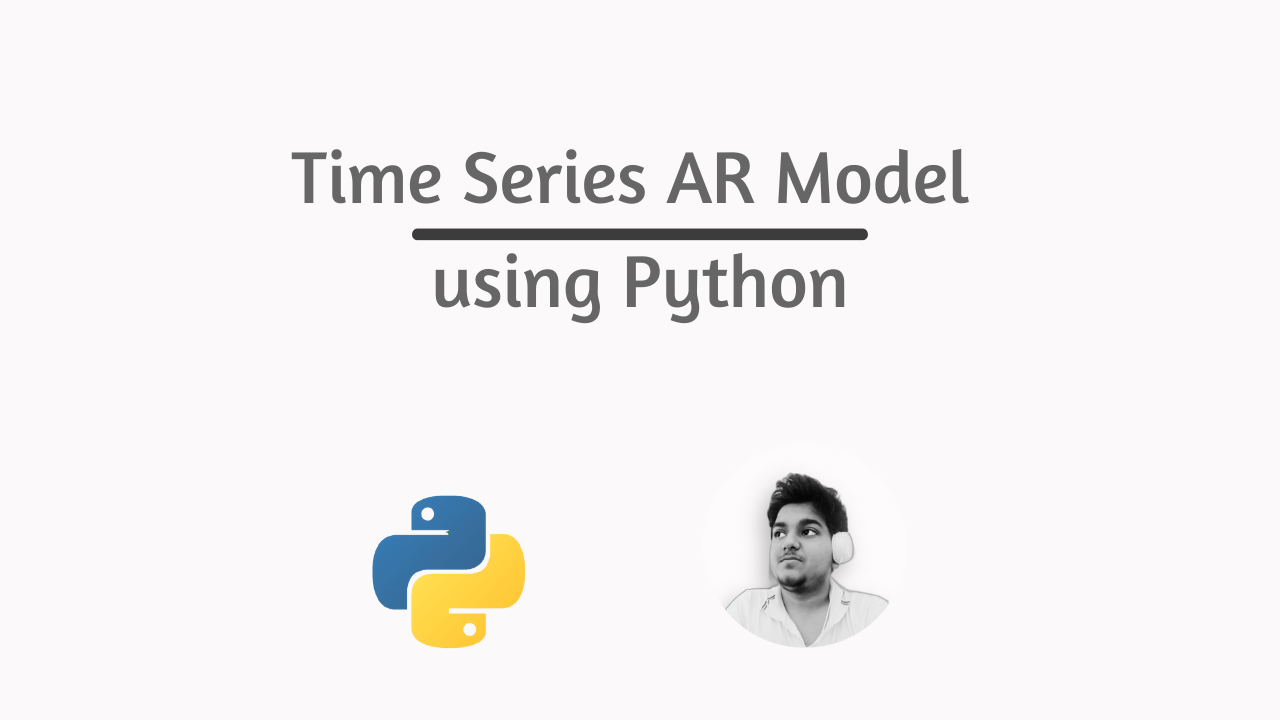

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings("ignore")


## **Import Dataset**

In [ ]:
filepath = 'https://raw.githubusercontent.com/00arunkumar/Time-Series-Analysis-using-Python/main/Datasets/daily-min-temperatures.csv'

df = pd.read_csv(filepath, index_col = 0, parse_dates = True)

x = df.values

print('Shape of the dataset \t', df.shape)
print()
print('-----------------------------------------')
print('Original Dataset \n', df.head())
print()
print('-----------------------------------------')
print('After Extracting only temperature \n', x)

Shape of the dataset 	 (3650, 1)

-----------------------------------------
Original Dataset 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

-----------------------------------------
After Extracting only temperature 
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

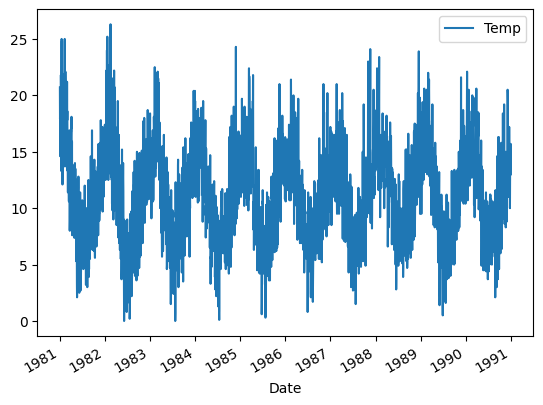

In [ ]:
df.plot()

## **Check for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print('1. ADF :', dftest[0])
print('2. P-Value :', dftest[1])
print('3. Num of Lags :', dftest[2])
print('4. Num of observations used for ADF Regression and critical values calculations :', dftest[3])
print('5. Critical Values : ')
for key, val in dftest[4].items():
  print("\t", key, ": ", val)

1. ADF : -4.4448049246117
2. P-Value : 0.0002470826300360994
3. Num of Lags : 20
4. Num of observations used for ADF Regression and critical values calculations : 3629
5. Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


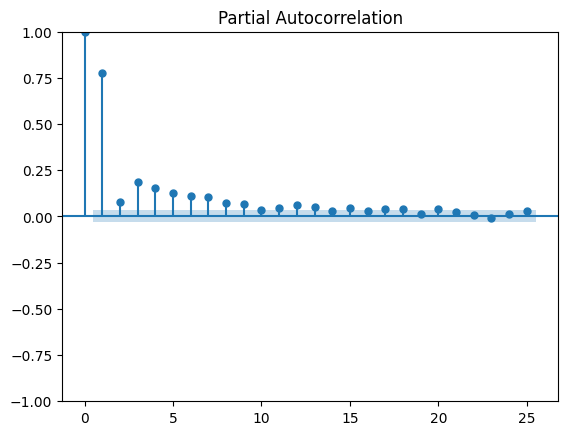

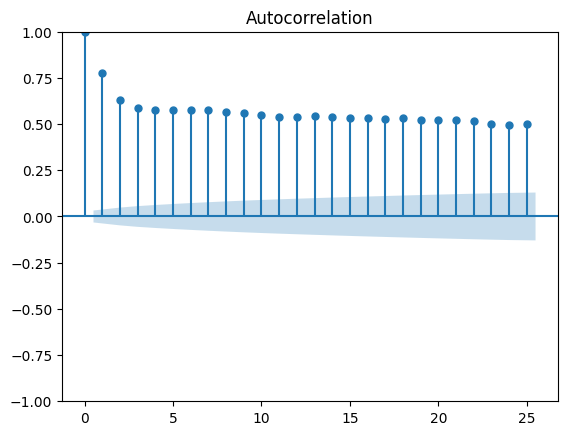

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(df['Temp'], lags = 25)
acf = plot_acf(df['Temp'], lags = 25)

## **Spliting the dataset into Train and Test : Testing last 7 days**

In [ ]:
train = x[:len(x) - 7]
test = x[len(x) - 7:]

In [ ]:
model = AutoReg(train, lags = 10).fit()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 21 Sep 2023   AIC                          16775.028
Time:                        05:03:39   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
print(len(train))

3643


## **Make Prediction on Test set and compare**

In [ ]:
pred = model.predict(start = len(train), end = len(x) - 1, dynamic = False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


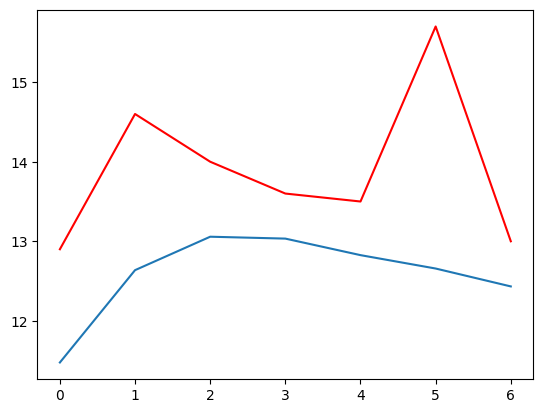

In [ ]:
from matplotlib import pyplot

pyplot.plot(pred)
pyplot.plot(test, color = 'red')

print(pred)

## **Calculating Error**

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, pred))

In [ ]:
print(rmse)

1.5638196220860605


## **Making Future Prediction**

In [ ]:
pred_future = model.predict(start = len(x) + 1, end = len(x) + 7, dynamic = False)

print('The future predictions for the next week')
print(pred_future)

print()
print('number of predictions made: \t', len(pred_future))

The future predictions for the next week
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]

number of predictions made: 	 7
